In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [29]:
np.random.seed(42)
n_samples = 1000

In [30]:
data = {
    'age': np.random.randint(20, 70, n_samples),
    'job': np.random.choice(['admin.', 'yellow-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed'], n_samples),
    'marital': np.random.choice(['married', 'single', 'divorced'], n_samples),
    'education': np.random.choice(['primary', 'secondary', 'tertiary', 'unknown'], n_samples),
    'default': np.random.choice(['yes', 'no'], n_samples),
    'balance': np.random.randint(-3000, 50000, n_samples),
    'housing': np.random.choice(['yes', 'no'], n_samples),
    'loan': np.random.choice(['yes', 'no'], n_samples),
    'contact': np.random.choice(['cellular', 'telephone'], n_samples),
    'day': np.random.randint(1, 31, n_samples),
    'month': np.random.choice(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], n_samples),
    'duration': np.random.randint(0, 5000, n_samples),
    'campaign': np.random.randint(1, 10, n_samples),
    'pdays': np.random.randint(-1, 30, n_samples),
    'previous': np.random.randint(0, 10, n_samples),
    'poutcome': np.random.choice(['unknown', 'other', 'failure', 'success'], n_samples),
    'y': np.random.choice([0, 1], n_samples)
}

In [31]:
# CREATE DATAFRAME
df = pd.DataFrame(data)
print(df)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

     age            job   marital  education default  balance housing loan  \
0     58        student   married  secondary     yes     2755      no  yes   
1     48         admin.   married  secondary      no     7825      no  yes   
2     34     management    single    unknown      no    19693     yes   no   
3     62        retired  divorced    primary     yes     1117     yes  yes   
4     27     management   married  secondary     yes    21729     yes  yes   
..   ...            ...       ...        ...     ...      ...     ...  ...   
995   45  yellow-collar    single    unknown      no    43546     yes  yes   
996   53  self-employed   married   tertiary     yes     3771     yes   no   
997   64        retired    single  secondary     yes    13526      no  yes   
998   25         admin.   married    unknown      no    26896     yes   no   
999   56     unemployed   married    primary      no    28923     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [32]:
#DEFINE VARIABLES
X = df.drop(columns=['y'])
y = df['y']

In [33]:
#DATA OF TRAINING SETS AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#CREATE DECISION TREE CLASSIFIER
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
#MAKE PREDICTIONS
y_pred = clf.predict(X_test)

In [36]:
#EVALUATION OF MODEL
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [37]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.43
Precision: 0.46
Recall: 0.44
F1 Score: 0.45


In [38]:
#PRINT REPORT OF CLASSIFICATION
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.42      0.41        95
           1       0.46      0.44      0.45       105

    accuracy                           0.43       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.43      0.43      0.43       200



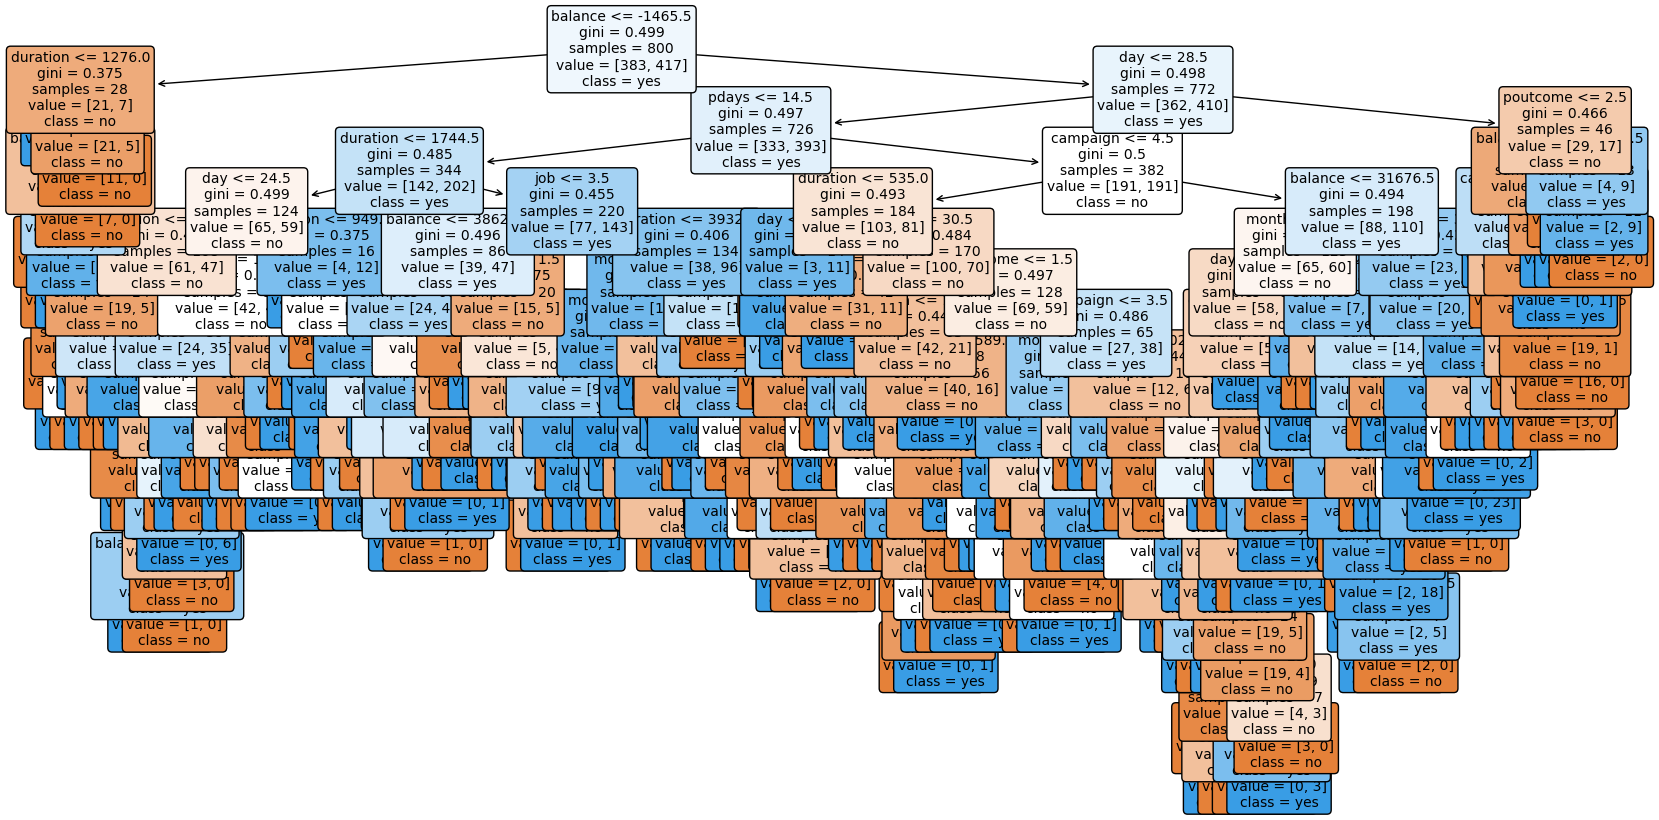

In [40]:
#PLOT DECISION TREE
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['no', 'yes'], rounded=True, fontsize=10)
plt.show()